# Модуль 2
---

Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Загружаем данные

In [2]:
df = pd.read_csv("c1_result.csv")

In [3]:
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,7.583333,10.555556,4.444444,7.5,0.29,0.0,0.0
1,1,2016-03-14 14:05:39,1,-73.975090,40.758766,-73.953201,40.765068,0,22.433333,10.555556,4.444444,7.5,0.29,0.0,0.0
2,1,2016-03-14 15:04:38,1,-73.994484,40.745087,-73.998993,40.722710,0,11.583333,10.555556,4.444444,7.5,0.29,0.0,0.0
3,2,2016-03-14 04:24:36,3,-73.944359,40.714489,-73.910530,40.709492,0,12.583333,10.555556,4.444444,7.5,0.29,0.0,0.0
4,2,2016-03-14 14:57:56,1,-73.952881,40.766468,-73.978630,40.761921,0,17.500000,10.555556,4.444444,7.5,0.29,0.0,0.0


In [5]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975120 entries, 0 to 975119
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   vendor_id            975120 non-null  int64         
 1   pickup_datetime      975120 non-null  datetime64[ns]
 2   passenger_count      975120 non-null  int64         
 3   pickup_longitude     975120 non-null  float64       
 4   pickup_latitude      975120 non-null  float64       
 5   dropoff_longitude    975120 non-null  float64       
 6   dropoff_latitude     975120 non-null  float64       
 7   store_and_fwd_flag   975120 non-null  int64         
 8   trip_duration        975120 non-null  float64       
 9   maximum temperature  975120 non-null  float64       
 10  minimum temperature  975120 non-null  float64       
 11  average temperature  975120 non-null  float64       
 12  precipitation        975120 non-null  float64       
 13  snow fall     

## Конструирование признаков

Добавим временные признаки

In [7]:
df["year"] = df["pickup_datetime"].apply(lambda x : x.year)
df["month"] = df["pickup_datetime"].apply(lambda x: x.month)
df["dayofweek"] = df["pickup_datetime"].apply(lambda x: x.dayofweek)
df["hour"] = df["pickup_datetime"].apply(lambda x : x.hour)

In [9]:
df = df.drop("pickup_datetime", axis = 1)

In [10]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,year,month,dayofweek,hour
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,7.583333,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,0,17
1,1,1,-73.975090,40.758766,-73.953201,40.765068,0,22.433333,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,0,14
2,1,1,-73.994484,40.745087,-73.998993,40.722710,0,11.583333,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,0,15
3,2,3,-73.944359,40.714489,-73.910530,40.709492,0,12.583333,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,0,4
4,2,1,-73.952881,40.766468,-73.978630,40.761921,0,17.500000,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,0,14


## Визуализация

<AxesSubplot:>

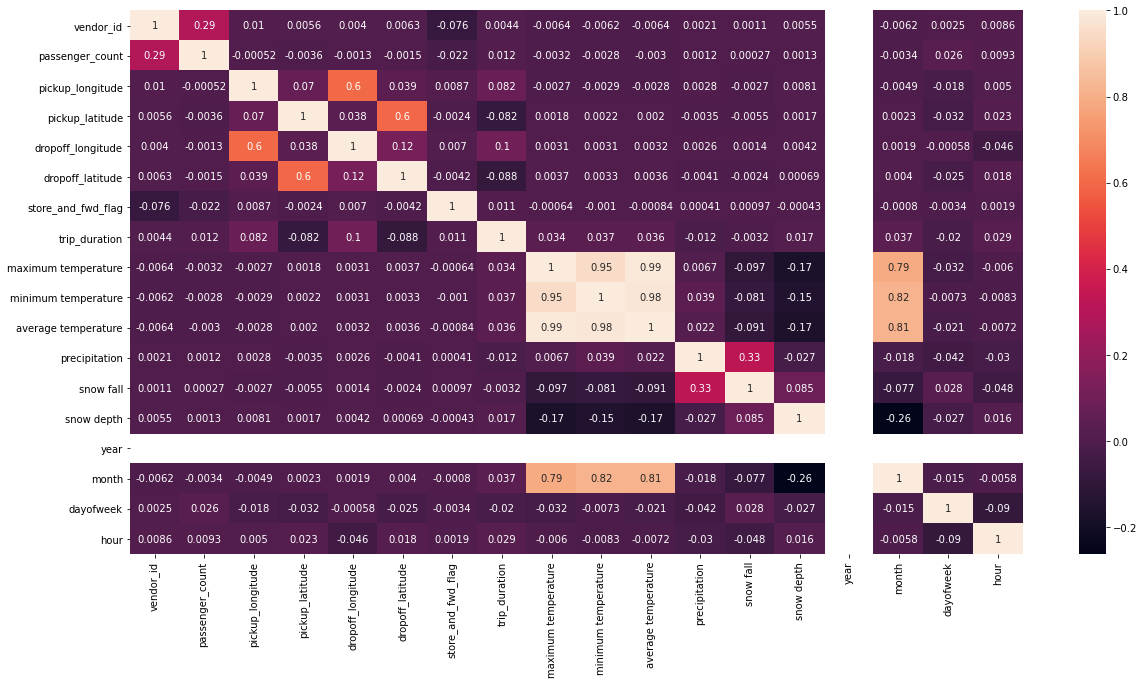

In [13]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

#### График зависимостей аттрибутов на целевую переменную

In [14]:
import numpy as np

<AxesSubplot:>

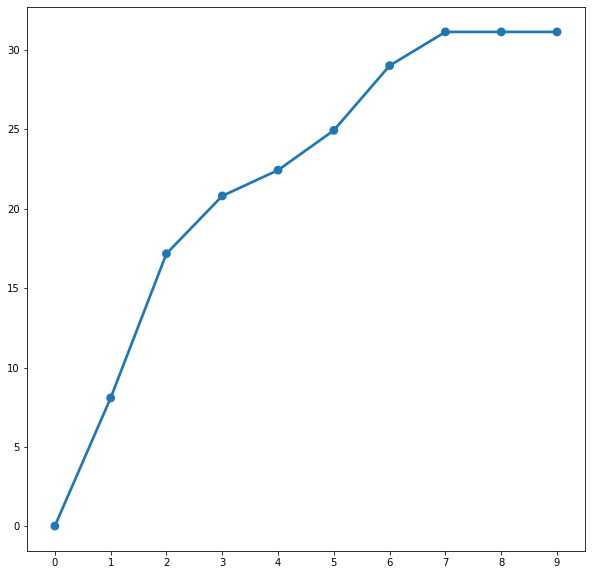

In [15]:
plt.figure(figsize = (10, 10))
sns.pointplot(y=np.sort(df["trip_duration"]), x = np.sort(df["passenger_count"]))

<AxesSubplot:>

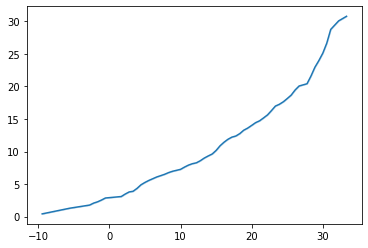

In [16]:
sns.lineplot(y = np.sort(df["trip_duration"]), x = np.sort(df["maximum temperature"]))

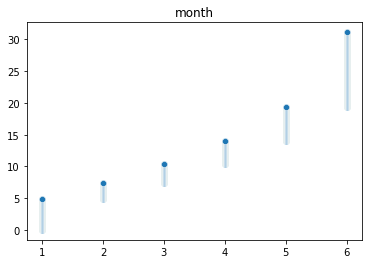

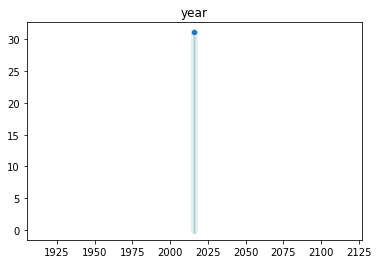

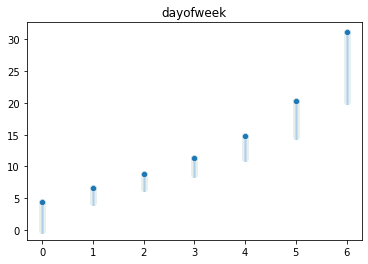

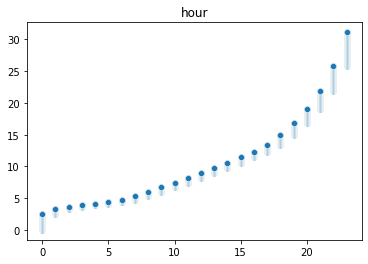

In [18]:
for pr in ["month", "year", "dayofweek", "hour"]:
    sns.scatterplot(y = np.sort(df["trip_duration"]), x = np.sort(df[pr]))
    plt.title(pr)
    plt.show()

## Разбиение набора данных

In [19]:
X = df.drop("trip_duration", axis = 1) 
y = df["trip_duration"].array

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error
def score(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"R^2 : {r2}")
    print("-" * 20)
    print(f"MAE: {mae}")
    print("-" * 20)
    print()

1. `RandomForestRegressor`
2. `GradientBoostingRegressor`
3. `LinearRegression`

In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

#### RandomForestRegressor

In [23]:
rfc = RandomForestRegressor(verbose=3, n_jobs=-1)
#Производим обучение
rfc.fit(X_train, y_train)
score(y_test, rfc.predict(X_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100building tree 5 of 100
building tree 6 of 100building tree 7 of 100
building tree 8 of 100


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   26.0s


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.7s


R^2 : 0.7618671769177391
--------------------
MAE: 2.461989712920965
--------------------



[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    4.1s finished


In [24]:
rfc.score(X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.3s finished


0.7618671769177391

### GradientBoostingRegressor

In [25]:
grb = GradientBoostingRegressor(verbose=3)
grb.fit(X_train, y_train)
score(y_test, grb.predict(X_test))

      Iter       Train Loss   Remaining Time 
         1          46.6697            1.82m
         2          45.6186            1.79m
         3          44.7587            1.77m
         4          44.0318            1.75m
         5          43.3746            1.73m
         6          42.8365            1.71m
         7          42.1493            1.70m
         8          41.7226            1.68m
         9          41.3789            1.66m
        10          40.8455            1.65m
        11          40.5291            1.63m
        12          40.2606            1.61m
        13          39.4618            1.59m
        14          39.1791            1.57m
        15          38.5182            1.55m
        16          37.5929            1.54m
        17          37.3513            1.52m
        18          37.1881            1.50m
        19          36.5488            1.48m
        20          36.3504            1.47m
        21          35.9562            1.45m
        2

In [26]:
grb.score(X_test, y_test)

0.45557417902355735

### LinearRegression

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score(y_test, lr.predict(X_test))

R^2 : 0.005135769423096015
--------------------
MAE: 5.52042332244962
--------------------



In [28]:
lr.score(X_test, y_test)

0.005135769423096015

# Вывод

1. Данные были разбиты на тренировочную и тестовую выборки
2. Данные провизувлизированы и был совершен пространственный анализ
3. Произведено обучение и регрессия на реальных данных. Лучшей моделью себя пока RFR(`RandomForestRegressor()`)
4. Был произведен Feature Engineering 